In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.cross_validation import train_test_split
csv = ['/RegularSeasonCompactResults.csv',
'/RegularSeasonDetailedResults.csv',
'/Seasons.csv',
'/Teams.csv',
'/TourneyCompactResults.csv',
'/TourneyDetailedResults.csv',
'/TourneySeeds.csv',
'/TourneySlots.csv',
'/sample_submission.csv']
direct = 'C:/Users/danil/Downloads/Data/March_Madness'
sea_det = pd.read_csv(direct+csv[1])
sea_det.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [289]:
# sea_det['Season'] = pd.to_datetime(sea_det['Season'])
# sea_det['Season'].value_counts()
print(type(sea_det['Season'][0]))

<class 'numpy.int64'>


In [290]:
#predict 2013-2016 tournament 
sea_det = sea_det[(sea_det['Season'] == 2016)]
#(sea_det['Season'] == 2013)|(sea_det['Season'] == 2014)|(sea_det['Season'] == 2015)|
sea_det.drop(labels = ['Numot','Wscore','Daynum','Lscore','Wloc'],inplace=True, axis=1)
sea_det.head()

,Season,Wteam,Lteam,Wfgm,Wfga,Wfgm3,Wfga3,Wftm,Wfta,Wor,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
65872,2016,1104,1244,29,57,4,17,15,27,10,...,19,19,26,12,27,6,16,7,4,25
65873,2016,1105,1408,25,64,8,29,10,17,14,...,27,16,26,18,30,11,19,6,7,21
65874,2016,1112,1334,24,61,6,20,25,32,17,...,19,13,19,5,23,9,9,3,1,25
65875,2016,1115,1370,20,55,7,30,11,16,8,...,16,16,28,10,31,12,15,5,0,17
65876,2016,1116,1380,32,66,8,15,14,26,17,...,12,20,28,7,21,9,17,8,5,22


In [291]:
#make new table 
wins = pd.DataFrame()
wins_col = ['Season','Wteam', 'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm',
       'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']
for i in wins_col:
    wins[i] = sea_det[i]
loss = pd.DataFrame()
loss_col = ['Lteam', 'Lfgm','Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 
            'Lor', 'Ldr', 'Last', 'Lto','Lstl', 'Lblk', 'Lpf']
for i in loss_col:
    loss[i] = sea_det[i]

f_df = pd.DataFrame()
#print(type(wins['Wteam'].unique()))
for k in wins['Wteam'].unique():
    ar = []
    wins_df = wins[wins['Wteam'] == k]
    #season = 
    Wfgp = np.mean((wins_df['Wfgm']/wins_df['Wfga']))
    Wfg3p = np.mean((wins_df['Wfgm3']/wins_df['Wfga3']))
    Wftp = np.mean((wins_df['Wftm']/wins_df['Wfta']))
    #ar.append(season)
    ar.append(k)
    ar.append(Wfgp)
    ar.append(Wfg3p)
    ar.append(Wftp)
    other = ['Wor','Wdr','Wast','Wto','Wstl','Wblk','Wpf']
    for i in other:
        metric = np.mean(wins_df[i])
        ar.append(metric)
    NWins = wins_df.shape[0]
    ar.append(NWins)
    
    #losses
    loss_df = loss[loss['Lteam'] == k]
    Lfgp = np.mean((loss_df['Lfgm']/loss_df['Lfga']))
    Lfg3p = np.mean((loss_df['Lfgm3']/loss_df['Lfga3']))
    Lftp = np.mean((loss_df['Lftm']/loss_df['Lfta']))
    
    ar.append(Lfgp)
    ar.append(Lfg3p)
    ar.append(Lftp)
    other = ['Lor','Ldr','Last','Lto','Lstl','Lblk','Lpf']
    for i in other:
        metric = np.mean(loss_df[i])
        ar.append(metric)
    NLoss = loss_df.shape[0]
    ar.append(NLoss)
    f_df = f_df.append([ar], ignore_index= True)
f_df.columns = ['Team','Wfgp','Wfg3p','Wftp','Wor','Wdr','Wast',
                               'Wto','Wstl','Wblk','Wpf','NWins','Lfgp',
                               'Lfg3p','Lftp','Lor','Ldr','Last',
                               'Lto','Lstl','Lblk','Lpf','NLoss']
f_df.head()

,Team,Wfgp,Wfg3p,Wftp,Wor,Wdr,Wast,Wto,Wstl,Wblk,...,Lfg3p,Lftp,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf,NLoss
0,1104,0.451300,0.356046,0.648854,10.111111,26.5000,12.222222,13.555556,6.500,5.277778,...,0.323539,0.616699,9.357143,22.785714,8.428571,13.000000,4.500000,5.285714,20.428571,14
1,1105,0.422549,0.285764,0.730357,11.900000,26.2000,13.300000,11.800000,5.600,2.200000,...,0.271157,0.639342,11.111111,21.277778,12.277778,11.722222,5.611111,2.111111,19.666667,18
2,1112,0.488867,0.387774,0.717099,10.960000,29.4400,15.120000,12.360000,5.160,4.600000,...,0.353436,0.753504,13.750000,26.000000,12.625000,14.250000,4.125000,5.375000,18.875000,8
3,1115,0.453580,0.331712,0.564261,9.500000,24.5000,10.250000,16.500000,8.000,5.500000,...,0.298170,0.627800,9.840000,19.440000,9.400000,15.360000,6.840000,3.200000,22.000000,25
4,1116,0.493718,0.457328,0.697413,10.875000,27.3125,18.875000,10.500000,7.875,6.375000,...,0.324215,0.690563,12.500000,23.437500,13.625000,11.812500,6.937500,3.937500,22.312500,16


In [292]:
#f1_df = f_df
#f1_df = f1_df.rename(columns={'Team':'Team1'})
df_tour = pd.read_csv(direct + csv[4])
df_tour.drop(labels=['Daynum', 'Wscore', 'Lscore', 'Wloc', 'Numot','Season'], 
             inplace=True, axis=1)
df_tour.head()

#df_tour = df_tour.rename(columns={'Wteam':'Team'})
#df_tour.head()
#df_dummy = pd.merge(left=df_tour, right=f_df, how='left', on=['Team'])
#df_dummy = df_tour.rename(columns={'Lteam':'Team1'})
#df_dummy1 = pd.merge(left=df_dummy, right=f1_df, how='left', on=['Team1'])
#df_dummy1.head()
# df_concat = pd.merge(left=df_dummy, right=df_lossseeds, on=['Season', 'Lteam'])
# df_concat['seed_diff'] = df_concat.win_seed - df_concat.loss_seed

# df_wins = pd.DataFrame()
# df_wins['seed_diff'] = df_concat['seed_diff']
# df_wins['result'] = 1

# df_losses = pd.DataFrame()
# df_losses['seed_diff'] = -df_concat['seed_diff']
# df_losses['result'] = 0

# df_for_predictions = pd.concat((df_wins, df_losses))

,Wteam,Lteam
0,1116,1234
1,1120,1345
2,1207,1250
3,1229,1425
4,1242,1325


In [293]:
#f_df.loc[f_df['Team'] == 1101]
df_diff = pd.DataFrame()
for i in range(0,len(df_tour)):
    wteam = df_tour['Wteam'][i]   
    lteam = df_tour['Lteam'][i] 
    wteam_stat = (f_df.loc[f_df['Team'] == wteam])
    lteam_stat = (f_df.loc[f_df['Team'] == lteam])
    diff = pd.DataFrame(wteam_stat.values - lteam_stat.values, columns = wteam_stat.columns)
    df_diff = df_diff.append([diff], ignore_index= True)
df_diff.head()

,Team,Wfgp,Wfg3p,Wftp,Wor,Wdr,Wast,Wto,Wstl,Wblk,...,Lfg3p,Lftp,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf,NLoss
0,-118.0,0.026227,0.056679,-0.035752,0.065476,-0.735119,1.875000,1.071429,0.541667,0.517857,...,-0.019464,-0.014699,-1.700000,0.237500,-0.275000,-0.687500,1.237500,1.237500,4.712500,6.0
1,-225.0,-0.018244,0.048307,-0.093310,-2.527972,-1.412587,-4.304196,2.451049,1.849650,0.234266,...,-0.036636,-0.046195,2.650000,-2.325000,-4.625000,0.975000,1.100000,0.025000,1.525000,12.0
2,-43.0,-0.037134,-0.044246,0.023470,1.416667,0.887500,-0.612500,1.116667,-0.112500,2.391667,...,-0.027349,0.005665,-1.300000,3.488889,1.133333,-0.133333,-2.233333,0.455556,5.166667,3.0
3,-196.0,-0.027369,-0.033132,-0.046133,-2.204482,-2.938375,-2.369748,-0.887955,-0.764706,-2.591036,...,-0.032764,0.094879,0.523810,-2.380952,-1.595238,1.964286,1.690476,-0.726190,1.916667,2.0
4,-83.0,0.019852,0.046202,-0.025890,1.739655,-1.834483,1.003448,0.398276,1.946552,0.310345,...,-0.042605,-0.060152,1.590909,2.136364,-1.340909,1.159091,2.386364,-1.431818,0.522727,-7.0


In [294]:
df_wins = pd.DataFrame()
df_wins = df_diff
df_wins['result'] = 1

df_losses = pd.DataFrame()
df_losses = -df_diff
df_losses['result'] = 0

df_pred = pd.concat((df_wins, df_losses))
df_pred.tail()

,Team,Wfgp,Wfg3p,Wftp,Wor,Wdr,Wast,Wto,Wstl,Wblk,...,Lftp,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf,NLoss,result
2045,9.0,0.005234,0.057849,0.024313,-3.642857,0.357143,-4.345238,-1.178571,-1.261905,-0.357143,...,-0.128327,-1.227273,-5.121212,-3.681818,-1.666667,0.363636,-0.772727,-5.363636,5.0,0
2046,45.0,0.059394,0.042931,0.051585,-4.111336,-2.706478,-0.091093,-2.959514,-2.283401,-1.985830,...,0.141272,-0.450549,0.978022,-0.615385,-2.549451,-3.725275,0.087912,1.252747,-6.0,0
2047,79.0,-0.039043,0.069275,-0.044768,-1.515038,-1.161654,-3.625940,1.671053,0.552632,0.590226,...,-0.080717,-2.192308,-5.358974,-2.884615,0.025641,4.153846,-1.730769,-3.538462,7.0,0
2048,-109.0,-0.003033,0.088249,-0.081390,1.547586,1.655172,-1.122759,1.931034,0.664828,2.082759,...,-0.019314,0.914286,4.257143,-2.628571,1.457143,-1.771429,1.200000,-0.457143,2.0,0
2049,-123.0,0.010270,-0.026951,-0.055949,5.184729,-0.130542,2.195813,-0.318966,0.844828,0.839901,...,-0.003223,2.700000,5.066667,1.300000,0.266667,-3.200000,1.700000,1.400000,1.0,0


In [295]:
df_pred.drop('Team',inplace = True, axis =1)

In [319]:
X_train = df_pred.drop('result',axis=1)
Y_train = df_pred['result']

model_LR= LogisticRegression()
params = {'C': np.logspace(start=-5, stop=3, num=9)}
model_LR = GridSearchCV(model_LR, params, scoring='neg_log_loss', refit=True)
model_LR.fit(X_train,y_train)

pred_probs = model_LR.predict_proba(X_train)
#plt.scatter(X_train, pred_probs[:,1])

ValueError: Found input variables with inconsistent numbers of samples: [4100, 3895]

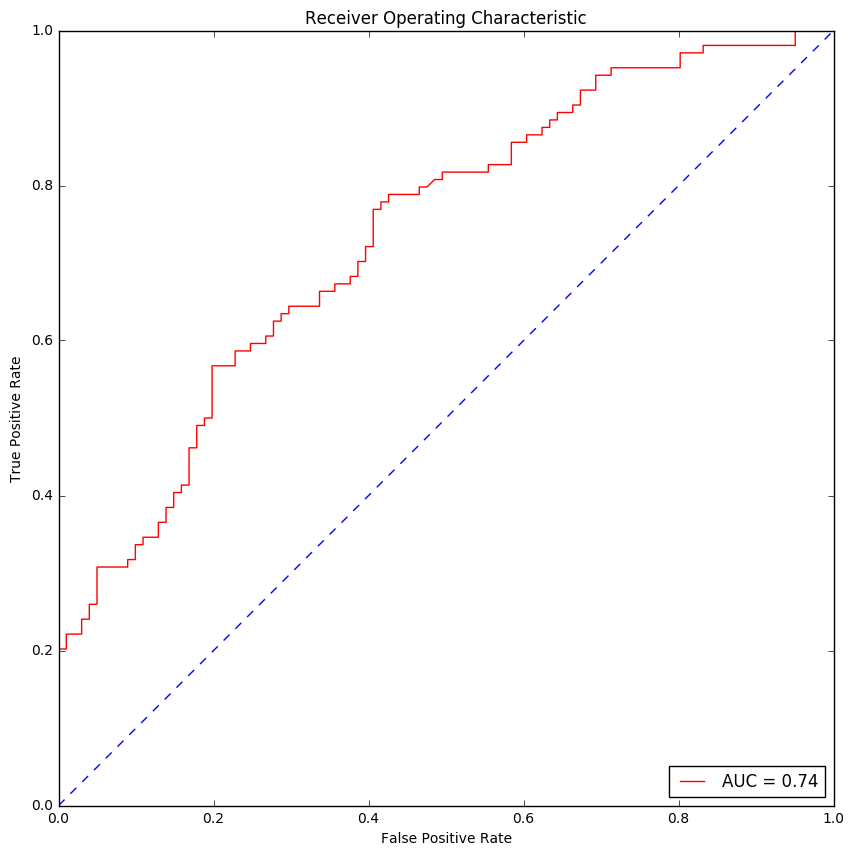

In [316]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)

auc_roc=metrics.roc_auc_score(y_test,y_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [317]:
predictions = model_LR.predict(X_train)

In [318]:
tp_filter = (predictions == 1) & (y_train == 1)
tp = len(predictions[tp_filter])

tn_filter = (predictions == 0) & (y_train == 0)
tn = len(predictions[tn_filter])

fp_filter = (predictions == 1) & (y_train == 0)
fp = len(predictions[fp_filter])

fn_filter = (predictions == 0) & (y_train == 1)
fn = len(predictions[fn_filter])

fpr = fp/(fp+tn) *100
tpr = tp/(tp+fn)*100
tnr = tn/(tn+fp) * 100
print("True Positive Rate: {:0.2f} %".format(tpr))
print("True Negative Rate: {:0.2f} %".format(tnr))
#print("False Positive Rate: {:0.2f} %".format(fpr))

correct_pred = tp+tn
accuracy = correct_pred/len(y_train) *100
print("Accuracy: {:0.2f} %".format(accuracy))

True Positive Rate: 50.00 %
True Negative Rate: 50.00 %
Accuracy: 200.00 %


C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  from ipykernel import kernelapp as app
C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
